<a href="https://colab.research.google.com/github/Abhiss123/AlmaBetter-Projects/blob/main/Markov_Chain_Based_Web_User_Journey_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is a Markov Chain?

In the context of websites, a Markov Chain helps us understand how users move between different pages on the site. Imagine a visitor is on the homepage of a website. Based on past user data, we can predict the likelihood that this visitor will go to the **"Services"** page, **"Contact"** page, or any other page next. The **Markov Chain** doesn't care about how the visitor arrived at the **homepage;** it only **cares about what the next step (page) is.** This sequence of **movements between pages is what a Markov Chain model captures.**

# How Does It Work?

**Markov Chains** are based on probabilities. In a website, if users are on the homepage, there might be a **40%** chance they'll go to the **"About Us"** page, a **30%** chance they'll go to the **"Products"** page, and a **30%** chance they'll go to **"Contact Us."** These probabilities are calculated from historical data, like how people have navigated the site before.

# Use Cases of Markov Chains

*  **Predicting User Behavior:** By analyzing patterns of how people move from one webpage to another, businesses can predict what users are likely to do next. For instance, if many users who visit the "Products" page later buy something, the website can make adjustments to make this process easier.

*  **Web Navigation:** If you want to improve a website, you can use a Markov Chain to see how users typically navigate. It helps optimize page layouts or menus, guiding users to the most important pages.

*  **Other Applications:**

*  **Stock Market Predictions:** Used to predict price movements based on past trends.

*  **Speech Recognition:** Used to predict the next word in speech based on the current word.

*  **Weather Forecasting:** Used to predict weather patterns based on current conditions.

# Real-Life Implementations

*  **Google's PageRank:** Google uses a form of Markov Chains to rank webpages. It calculates the probability of a user visiting a page by following links from other pages. The more links a page has, the higher the probability that a user will land on it.

*  **Recommender Systems:** Streaming services like Netflix or YouTube use Markov Chains to recommend what video or movie you might watch next based on your current viewing habits.

# How Does It Predict User Behavior?

Let’s say a user is on the **homepage of a website.** By looking at the **probabilities of where users typically go next (from historical data),** the **Markov Chain predicts the most likely page they’ll visit next.** For example, if **70% of users** go to the **"Products"** page from the **homepage,** the **Markov Chain will predict that for future users.**







# How do you collect the data for the Markov Chain model?

**Step-by-step guide to data collection:**

**1. Tracking User Behavior on a Website:**

* To build a Markov Chain, you need **data on how users are navigating your website.** This includes information like **which pages they visit and in what order.** You do not need to know the URLs explicitly, but you need the sequence of page visits.

* Tools like **Google Analytics, Hotjar, or Mixpanel** are commonly used to track **user behavior on websites**. These tools can give you reports on **page visits, session times, and user flow between pages.**

**2. Set Up Analytics:**

*  **Google Analytics:** Sign up for Google Analytics, install a tracking code on the website, and configure it to collect data. It will record every page a user visits and in what order.

*  **User Flow Reports:** In Google Analytics, there is a feature called **“User Flow,”** which shows how users move **between pages.** This is exactly the kind of data a **Markov Chain model needs.**

**3.  What kind of data do you need?**

* **Pages Visited:** For example, Homepage → About Us → Products → Contact Us.

*  **Click Tracking:** Which buttons or links users click on to navigate.

*  **Session Duration:** How long users spend on each page before moving to another.

* **Conversion Path:** For e-commerce sites, this could be the path users follow before making a purchase.







# Data Required for a Markov Chain Model

For a Markov Chain model, you need **sequential data** that shows the flow of user navigation across pages on the website. This data will allow you to **calculate transition probabilities between pages**, which is essential for predicting user behavior. Here's a breakdown of the data you need:

**Page Paths (Sequential Data):** You need the order in which users move from one page to another. This will tell you how users typically navigate your website. For example:

* **Homepage → Services → Contact Us**

* **Homepage → Blog → Article → Services**

*  **Sessions:** Information about user sessions, such as how many pages a user visits in one session and in what order.

* **Unique Page Views:** How many users viewed each page, and how often.

*  **User Flow Data:** This shows the path that users take from one page to another during their sessions.




# How to Find User Flow and Page Path Data in Google Analytics 4 (GA4)

**Here’s a step-by-step guide to finding the equivalent data you need in GA4:**

**Step 1:** Navigate to the **"Pages and Screens"** Report

In **GA4, the Behavior Flow** has been replaced with **detailed page path reports** that you can access via the "Pages and Screens" section.

**1. On the left-hand menu, under Engagement:**

* **Click on Pages and screens.**

This will show you the **pages users visit** on your website, along with **engagement metrics like views, average engagement time, and event count**.


**Step 2: Customize the Report to Show Page Transitions**

In the **"Pages and Screens"** report, you can see details about how users interact with specific pages. However, to better understand **page transitions**, follow these steps:

**1.** Click on the **"+ Add Comparison"** button at the top of the report.

2. **Set up a filter for the "Page path"** dimension:

*  Choose the **Page path and screen** class dimension to focus on specific URLs.

3. This will let you drill down into which pages users visit and their corresponding transitions between pages.

**Step 3: Export the Data**

Once you’ve customized the report to show page visits and interactions, you can export it:

1. At the **top-right corner** of the report, click the **Export button.**

2. Select **CSV** to download the data.

**Step 4: Analyzing Page Transitions**

While GA4 does not provide a **visual Behavior Flow** as in **Universal Analytics,** the Pages and Screens report along with the Event reports can still give you insights into how users move through the site, which is important for building a Markov Chain model.

# Next Steps for Collecting Sequential Data:

To complete the data collection needed for the Markov Chain model:

**1. Go to GA4’s Path Exploration:**

* Navigate to **Exploration** on the **left-hand side** of the GA4 dashboard.

* Choose **Path Exploration.**

* This report will show the paths users take from one page to another.

**2. Export the Path Data:**

* Once in **Path Exploration**, you can export the data that shows how users move between different pages in a session.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
# Import necessary libraries to help with data handling and processing
import numpy as np  # Used for mathematical operations (like probabilities)
import pandas as pd  # Used to handle CSV files (dataframes)
import random  # Used to generate random choices (for simulating the user journey)

# Step 1: Define file paths where the data is stored in your Google Drive.
# These are the locations of the CSV files we are going to use.
pages_and_screen_path = '/content/drive/MyDrive/Path Exploration dataset And Page and Screen Dataset/Pages And Screen Dataset1.csv'
path_exploration_path = '/content/drive/MyDrive/Path Exploration dataset And Page and Screen Dataset/Path Exploration Dataset.csv'

# Step 2: Load the CSV files into dataframes.
# The 'Pages And Screen' dataset contains information about each page's performance, like views, users, etc.
# The 'Path Exploration' dataset contains transition probabilities between different user actions (e.g., session start, page view).
pages_and_screen_data = pd.read_csv(pages_and_screen_path)
path_exploration_data = pd.read_csv(path_exploration_path)

In [ ]:
# Step 3: Display the first few rows of each dataset so we can check if the data is loaded correctly.
# This helps ensure we're working with the right data.
print("Pages and Screen Data:")
print(pages_and_screen_data.head())

print("\nPath Exploration Data:")
print(path_exploration_data.head())

Pages and Screen Data:
  Page path and screen class    Segment  Views  Active users  \
0                          /  All Users    305           128   
1        /adult-seo-service/  All Users     64            24   
2         /gold-seo-package/  All Users     40             7   
3      /diamond-seo-package/  All Users     34            14   
4     /advanced-seo-service/  All Users     32            13   

   Views per active user  Event count  Key events  Total revenue  
0               2.382812         1098           0              0  
1               2.666667          220           0              0  
2               5.714286           82           0              0  
3               2.428571          102           0              0  
4               2.461538           80           0              0  

Path Exploration Data:
       From / To  session_start  page_view  first_visit  scroll  click
0  session_start           0.00       0.95          0.0    0.03   0.01
1      page_view        

# Step 4 Explanation:

In a **Markov Chain model**, we deal with **states (also known as events)** that represent different actions or stages that users go through. For example, on a website, typical states might be actions like:

* session_start (when a user starts browsing),

* page_view (when a user views a specific page),

* scroll (when a user scrolls down the page),

* click (when a user clicks on a button or link).

In the **Path Exploration dataset,** these states are listed under a column named **From / To**, and we need to **extract this column** to create our **list of states.** This list will be used to understand and simulate how users move between these states on the website.

# Code Breakdown:

        states = path_exploration_data['From / To'].tolist()

* **path_exploration_data:** This is the **dataset loaded from the CSV file** that contains information about how users transition between different states.

* **['From / To']:** This refers to the column in the dataset that contains the names of the states. These are the events that describe the user's journey (e.g., **session_start, page_view**).

*  **.tolist():** This method converts the column into a list format so we can work with it easily in Python.


**Example with Sample Data:**

Let’s assume our **Path Exploration Dataset** looks like this:


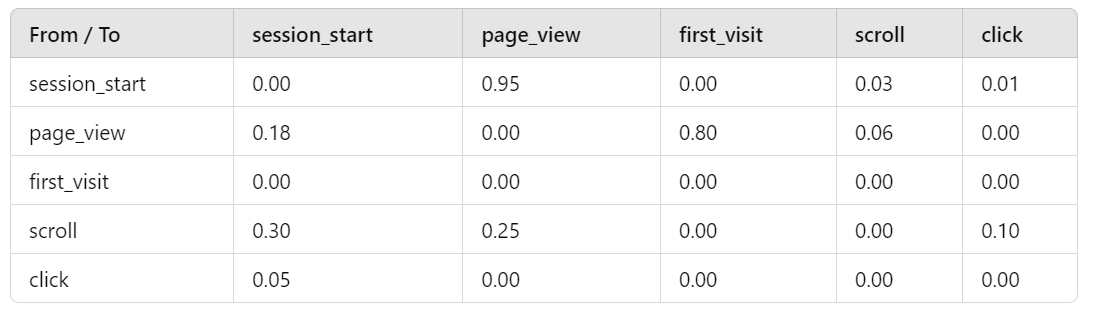

*  **From / To** column contains the states: **session_start, page_view, first_visit, scroll, and click.**

When we run this code:

           states = path_exploration_data['From / To'].tolist()

The result **(states)** will be:

           ['session_start', 'page_view', 'first_visit', 'scroll', 'click']

This list now contains all the possible states (or events) a user might transition through on the website. We will use this list to simulate how users navigate from one state to another based on the transition probabilities provided in the rest of the dataset.



In [ ]:
# Step 4: Extract the list of states (also called events) from the Path Exploration dataset.
# In this case, states could be things like 'session_start', 'page_view', etc.
# We are extracting the column called 'From / To' that contains these states.
states = path_exploration_data['From / To'].tolist()
states

['session_start', 'page_view', 'first_visit', 'scroll', 'click']

# What is a Transition Matrix?

* A **transition matrix** is a table that shows the **probabilities** of moving from **one state to another** in a system. In this case, it shows how likely it is for a user to move from one action (like **session_start**) to another action (like **page_view**) on a website.

**Code Breakdown:**

         transition_matrix = path_exploration_data.drop(columns=['From / To']).values

*  **path_exploration_data:** This is the dataset that contains both the states (like **session_start, page_view**) and the probabilities of transitioning from one state to another.

*  **drop(columns=['From / To']):** This **removes the column** that contains the **names of the states** (the **From / To** column), **leaving only the numbers** (the probabilities of transitioning between states).

*  **.values:** This converts the **remaining data** (which is now just the **numbers**) into a **NumPy array** (a **numerical format** that’s easy to work with in **Python**).

After running this code, we’ll have a **transition matrix**, which is a grid of numbers representing the **probabilities of moving from one state to another.**


**Example with Sample Data:**

Let’s assume we have the following **Path Exploration Dataset:**

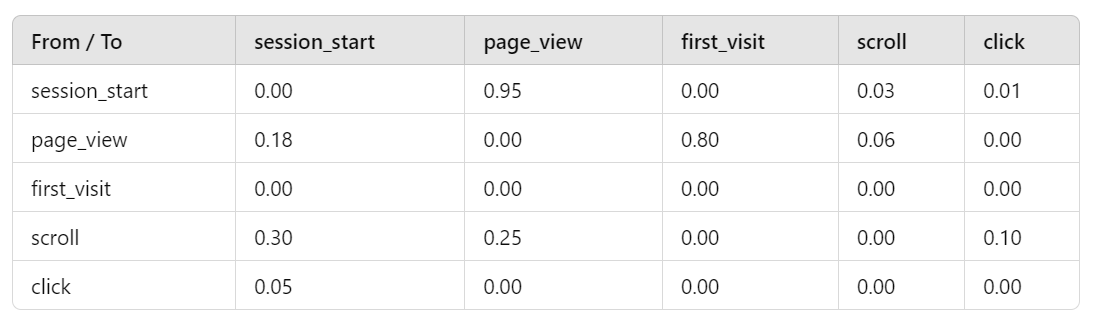

**Step-by-Step Process:**

*  **drop(columns=['From / To']):**

* This step removes the 'From / To' column, which contains the names of the states, so we are left with just the numbers (probabilities).

After dropping the column, the data looks like this:

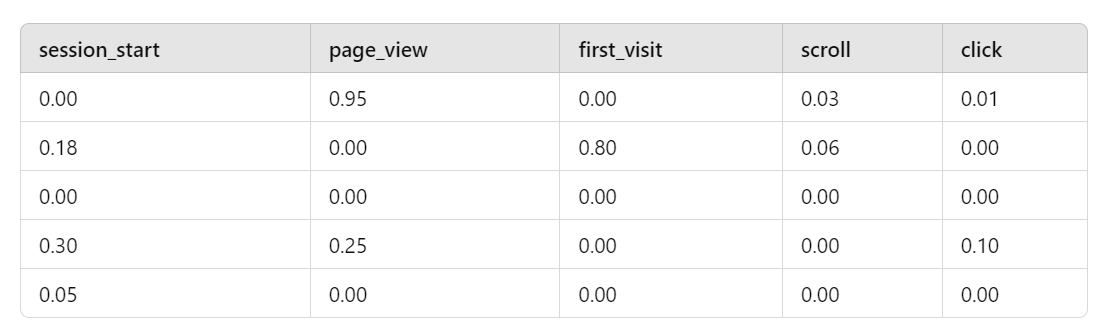

* **.values:**

* This converts the remaining data into a NumPy array (essentially a grid of numbers that can be used for mathematical operations).

* After converting to a NumPy array, the result will look like this:

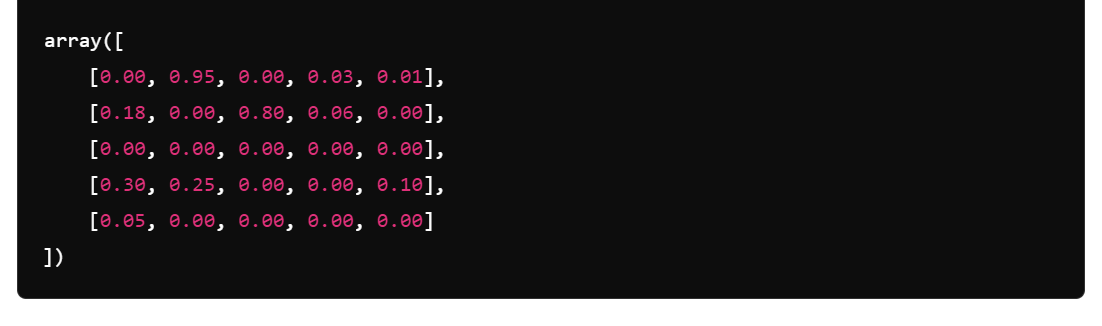



# What Does This Transition Matrix Represent?

 **Each row** in the transition matrix represents one state (or action) the user is in, and **each column** represents the **next state** the **user might move to.** The number in each cell is the probability that the user will move from the **current state to the next state.**

**For example:**

 In the **first row (for session_start)**, the probabilities are **[0.00, 0.95, 0.00, 0.03, 0.01]**. This means:

* There’s a **95% chance** that after session_start, the user will go to **page_view.**

* There’s a **3% chance** that after session_start, the user will go to **scroll.**

* There’s a **1% chance** that after session_start, the user will go to **click.**

In the **second row (for page_view)**, the probabilities are **[0.18, 0.00, 0.80, 0.06, 0.00].** This means:

*  There’s an **18% chance** that after **page_view**, the user will go back to **session_start.**

* There’s an **80% chance** that after **page_view**, the user will move to **first_visit.**

* There’s a **6% chance** that after **page_view**, the user will go to **scroll.**


# Why is this Important?

The **transition matrix** is the core of **the Markov Chain model.** It tells us the likelihood of a user moving **from one state to another**, allowing us to **predict user behavior.**

In [ ]:
# Step 5: Extract the transition probabilities.
# This matrix (a grid of numbers) shows the likelihood that a user moves from one state to another.
# We remove the 'From / To' column and only keep the numbers (probabilities).
transition_matrix = path_exploration_data.drop(columns=['From / To']).values
transition_matrix

array([[0.  , 0.95, 0.  , 0.03, 0.01],
       [0.18, 0.  , 0.8 , 0.06, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.3 , 0.25, 0.  , 0.  , 0.1 ],
       [0.05, 0.  , 0.  , 0.  , 0.  ]])

# Why is this step important?

In a **Markov Chain model**, the **transition matrix** and the **list of states must match in size** because:

* **Each row** in the transition matrix represents **a state** (like **session_start, page_view).**

* **Each column** represents the next state **a user could transition to.**

* The **transition matrix** should have the **same number of rows and columns** as **there are states**. Otherwise, the **model won’t** be able to properly **simulate the transitions.**

This step ensures that the matrix is square (same number of rows and columns) and that it corresponds to the number of states in the list.

#  Code Breakdown:

    if transition_matrix.shape[0] != len(states):
    print(f"Mismatch: {transition_matrix.shape[0]} rows in transition matrix, but {len(states)} states.")
    # Trim or pad the transition matrix to make it match the number of states
    transition_matrix = transition_matrix[:len(states), :len(states)]

**1. transition_matrix.shape[0]:**

* This gets the number of rows in the transition matrix. Each row corresponds to a state (like **session_start, page_view,** etc.).

**2. len(states):**

* This gets the number of states in the list (states), which we extracted in Step 4.

**3. if transition_matrix.shape[0] != len(states)::**

*  We check if the number of rows in the transition matrix **does not match** the number of states. If the sizes don’t match, we print a message and adjust the matrix.

**4. transition_matrix[:len(states), :len(states)]:**

*  If there is a **mismatch,** we **adjust the** **matrix.** Here, we **trim the matrix to ensure it has the same number of rows and columns** as the **number of states.** This operation selects only the **necessary rows and columns** to ensure that the **matrix is square and matches the list of states.**

**Step-by-Step Process:**

**1. Before the Check:**

* Assume we have 5 states in the states list: **['session_start', 'page_view', 'first_visit', 'scroll', 'click'].**

* But let’s say the **transition matrix** only has **4 rows and columns** instead of **5** due to missing or incomplete data.

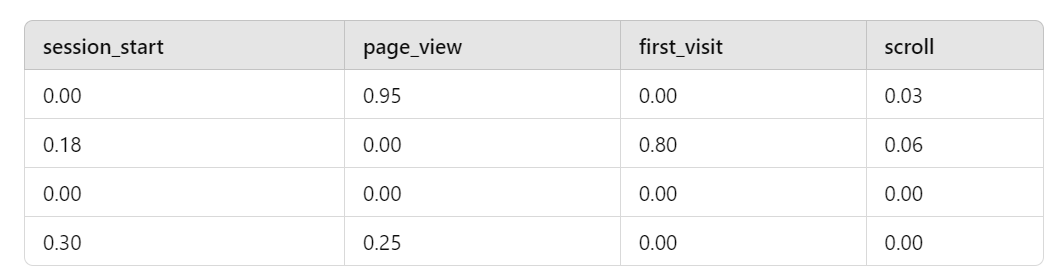

* Here, the transition matrix has **4 rows and 4 columns,** but we need **5** rows and columns to match the **5 states.**

**2. Checking the Matrix Size:**

*  The check **transition_matrix.shape[0] != len(states)** would return True because the number of rows in the matrix **(4)** doesn’t match the number of states **(5).**

* The code prints:



       Mismatch: 4 rows in transition matrix, but 5 states.

**3. Adjusting the Matrix:**

*  The transition matrix is trimmed or padded to make sure it has the right size. In this case, since the matrix has fewer rows and columns, we might trim it or pad it to match the number of states.

* After adjustment, the transition matrix would look like this:


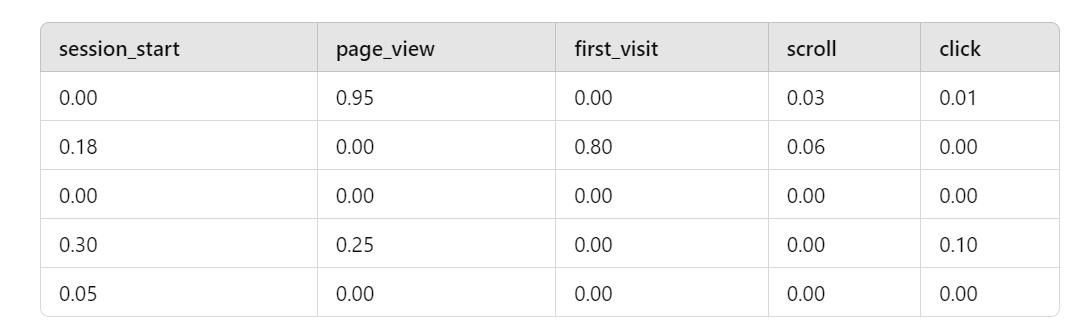


Now, the **transition matrix** has 5 rows and 5 columns, matching the 5 states (**session_start, page_view, first_visit, scroll, and click**).



In [ ]:
# Step 6: Check if the transition matrix and the list of states match in size.
# We need to make sure that the number of rows in the transition matrix matches the number of states.
# If they don't match, we will adjust the matrix by trimming or padding it.
if transition_matrix.shape[0] != len(states):
    print(f"Mismatch: {transition_matrix.shape[0]} rows in transition matrix, but {len(states)} states.")
    # Trim or pad the transition matrix to make it match the number of states
    transition_matrix = transition_matrix[:len(states), :len(states)]

transition_matrix

array([[0.  , 0.95, 0.  , 0.03, 0.01],
       [0.18, 0.  , 0.8 , 0.06, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.3 , 0.25, 0.  , 0.  , 0.1 ],
       [0.05, 0.  , 0.  , 0.  , 0.  ]])

# Why is this step important?

In a **Markov Chain model**, each row of the **transition matrix** represents the **probabilities of moving from one state to another**. The sum of each row should equal 1, meaning the user must move to some next state. If the sum of a row is 0, it means the model doesn’t know where the user might go next, which will cause issues when simulating the user’s journey.

# What does this step do?

* **If a row sums to zero,** the model cannot make a decision about where the user should go next. This step assigns **equal probabilities** to all possible states when this happens.

*  **If a row sums to something other than 1,** we normalize it, meaning we adjust the values so that the row sums to exactly 1, representing valid probabilities.

# Code Breakdown:

    for i, row_sum in enumerate(transition_matrix.sum(axis=1)):
       if row_sum == 0:
          # If the row sums to zero, assign equal probability to all states.
          transition_matrix[i] = np.ones(len(states)) / len(states)
       else:
         # Normalize the row to make sure the sum of probabilities equals 1.
         transition_matrix[i] = transition_matrix[i] / row_sum


**1. transition_matrix.sum(axis=1):**

* **axis=1** means we sum each row of the transition matrix. Each row represents the **probabilities** of moving from one state to all other states.

* For example, in one row, we might have the probabilities for moving from **session_start to page_view, scroll, click,** etc.

**2. enumerate(transition_matrix.sum(axis=1)):**

*  We use **enumerate** to loop through the rows and get both the **index (i) and the sum of the row (row_sum).**

*  This allows us to check if any row sums to zero.

**3. if row_sum == 0::**

*  If the sum of a row is zero, it means there are no valid transition probabilities in that row, which is a problem.

**4. transition_matrix[i] = np.ones(len(states)) / len(states):**

* If a row sums to zero, we **assign equal probabilities** to all states in that row. We create an array of ones **(np.ones(len(states))),** where each value represents **an equal probability**, and **divide by the number of states** (len(states)) so that the **row sums to 1.**

* This ensures the user has an equal chance of moving to any state.

**5.  else: transition_matrix[i] = transition_matrix[i] / row_sum:**

* If the row does not sum to zero, we **normalize** it. This means we divide each value in the row by the sum of the **row (row_sum),** so the sum of the row becomes 1. This ensures that the probabilities are valid (summing to 1).

# Example with Sample Data:

Let’s assume we have the following transition matrix before we perform Step 7:

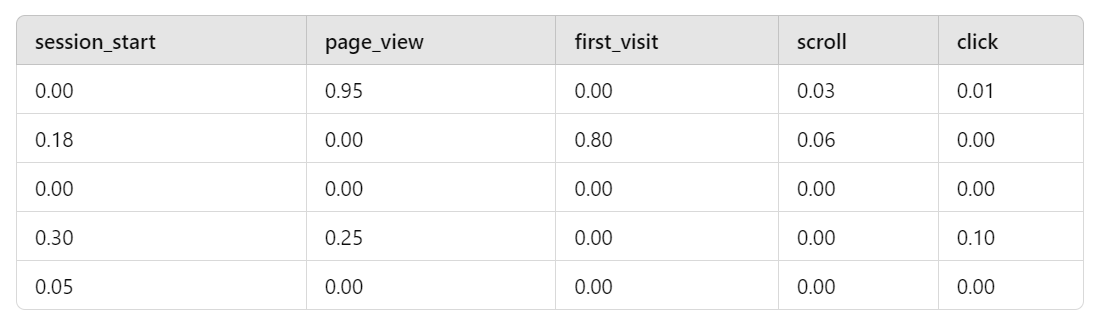


**Step-by-Step Process:**

**1. Calculate Row Sums:**

We calculate the sum of each row:

* **Row 1: 0.00 + 0.95 + 0.00 + 0.03 + 0.01 = 0.99** (this row needs to be normalized).

* **Row 2: 0.18 + 0.00 + 0.80 + 0.06 + 0.00 = 1.04** (this row also needs to be normalized).

* **Row 3: 0.00 + 0.00 + 0.00 + 0.00 + 0.00 = 0.00** (this is a problem).

* **Row 4: 0.30 + 0.25 + 0.00 + 0.00 + 0.10 = 0.65** (this row needs to be normalized).

* **Row 5: 0.05 + 0.00 + 0.00 + 0.00 + 0.00 = 0.05** (this row needs to be normalized).

**2. Fix the Rows:**

* **Row 3:** This row sums to zero, so we assign equal probabilities to all states:

       transition_matrix[2] = np.ones(5) / 5

After this, Row 3 becomes:

       [0.20, 0.20, 0.20, 0.20, 0.20]
Now, each state has a 20% chance of being visited, and the sum of the row is 1.

* **Rows 1, 2, 4, and 5:** These rows need to be normalized. For example, in **Row 5,** the sum was 0.05, so we normalize by dividing each value by 0.05:

       transition_matrix[4] = transition_matrix[4] / 0.05

*  After normalizing, **Row 5 becomes:**

          [1.00, 0.00, 0.00, 0.00, 0.00]

This means that after reaching this state, the only possible next state is the first one (100% chance).

**3. Resulting Transition Matrix:** After fixing and normalizing the rows, the transition matrix looks like this:

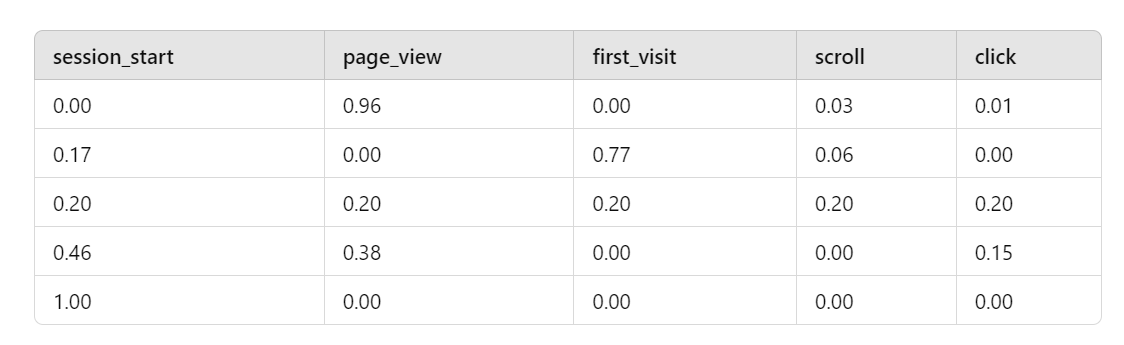

Now, all rows sum to 1, meaning the probabilities are valid for each state transition.

#  Why is This Important?

*  If a row sums to zero, it means there’s no information about where the user will go next, which will cause the simulation to fail. We fix this by assigning equal probabilities.

*  If a row sums to something other than 1, the probabilities are not valid (they should always sum to 1 in a Markov Chain). We fix this by normalizing the row, which adjusts the values so that they sum to 1.

In [ ]:
# Step 7: Ensure that no row in the transition matrix sums to zero.
# Sometimes, the sum of probabilities in a row might be zero, which will cause issues when simulating the journey.
# We fix this by assigning equal probabilities if the sum is zero.
for i, row_sum in enumerate(transition_matrix.sum(axis=1)):
    if row_sum == 0:
        # If the row sums to zero, assign equal probability to all states.
        transition_matrix[i] = np.ones(len(states)) / len(states)
    else:
        # Normalize the row to make sure the sum of probabilities equals 1.
        transition_matrix[i] = transition_matrix[i] / row_sum



# Overview:

* The function predicts a user's journey based on a Markov Chain model.

* It takes a starting state (like session_start), and based on the transition probabilities from the matrix, it simulates the next steps the user might take (such as page_view, scroll, etc.).

* The function repeats this process for a specified number of steps.


# Step-by-Step Explanation:

**1. Find the Index of the Starting State:**

         current_state = states.index(start_state)

**What It Does:** The function needs to know the position (or index) of the **start_state (e.g., session_start)** in the states list to work with the
transition matrix.

*  For example, if session_start is at position 0 in the list **['session_start', 'page_view', 'scroll', 'click'], then current_state = 0.**

**Example:**

If the start_state is session_start and states = **['session_start', 'page_view', 'scroll', 'click']**, this will return **current_state = 0** because **session_start is at index 0** in the list.

**2. Initialize the Journey (Tracking User’s History):**

      state_history = [start_state]

**What It Does:** It creates a list called state_history to keep track of the states (pages or actions) that the user visits during their journey. Initially, it contains only the start_state.

**Example:**

*  If the journey starts at **session_start, state_history** will look like this at the beginning: **['session_start'].**

**3. Loop Through the Steps:**

         for _ in range(steps):

* **What It Does:** This loop repeats the process of choosing the next state for a given number of steps. If steps = 10, it will run the loop 10 times, simulating 10 actions (or page transitions).

**4. Randomly Choose the Next State:**

        next_state = np.random.choice(states, p=transition_matrix[current_state])

*  **What It Does:** This is the key part where the function chooses the next state based on the transition matrix.

*  It uses np.random.choice to randomly pick the next state from the list of states.

* The probabilities for choosing the next state come from the current state's row in the transition_matrix.

**Example:**

*  If the user is currently in session_start (at index 0), the function will look at the first row of the transition matrix. If the transition matrix looks like this:

         session_start: [0.00, 0.96, 0.03, 0.01] (probabilities for next states)

Then:

*  **96% chance:** The user will move to **page_view.**

*  **3% chance:** The user will move to **scroll.**

*  **1% chance:** The user will move to **click.**

**5. Add the Next State to the History:**

       state_history.append(next_state)

*  **What It Does:** After the next state is chosen, it gets added to the state_history list to keep track of the states the user has visited.

**Example:**

* If the user started in **session_start** and then moved to **page_view, state_history** would look like this: **['session_start', 'page_view'].**


**6. Update the Current State:**

        current_state = states.index(next_state)


*  **What It Does:** The current state is updated to the next state for the next loop iteration. The function will continue from this new state in the next step.

**Example:**

*  If the user moved from **session_start to page_view,** the function now sets **current_state = 1** (since **page_view is at index 1** in the states list).

# Example Walkthrough:

Let’s simulate a 5-step user journey with the following setup:

*  **States:** ['session_start', 'page_view', 'scroll', 'click']

*  **Transition Matrix:**

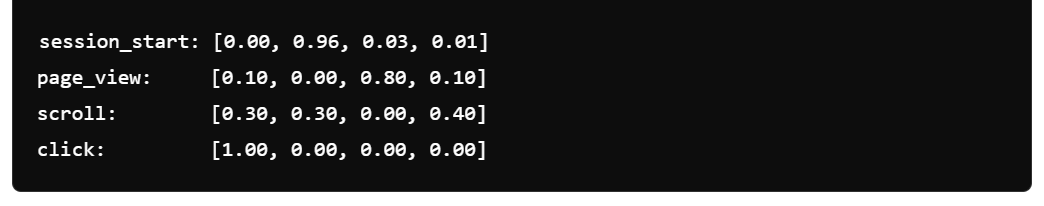



**1. Step 1:**


*  Start at **session_start (index 0).**

*  Based on the transition matrix, there's a **96%** chance of moving to **page_view.**

*  **Result:** Move to page_view.

*  **state_history** = ['session_start', 'page_view'].

**2.  Step 2:**

*  Now in **page_view** (index 1).

* From **page_view, there's an 80%** chance of moving to scroll.

* **Result:** Move to scroll.

* **state_history** = **['session_start', 'page_view', 'scroll'].**

**3.  Step 3:**

* Now in scroll (index 2).

* From scroll, there's a 40% chance of moving to click.

* Result: Move to click.

* **state_history = ['session_start', 'page_view', 'scroll', 'click'].**

**4.  Step 4:**

* Now in click (index 3).

* From click, there's a 100% chance of going back to session_start.

* **Result:** Move to session_start.

* **state_history** = **['session_start', 'page_view', 'scroll', 'click', 'session_start'].**


**5.  Step 5:**

* Now back in session_start (index 0).

* Based on the transition matrix, there's a 96% chance of moving to page_view.

* **Result:** Move to page_view.

* **state_history** = **['session_start', 'page_view', 'scroll', 'click', 'session_start', 'page_view'].**


In [ ]:
start_state = 'session_start'  # You can choose any valid state from the states list

# Find the index of the starting state in the list of states.
current_state = states.index(start_state)
    # Keep a list of states (events) the user goes through during the simulation.
state_history = [start_state]

# Loop through the number of steps (pages/actions) we want to simulate.
for _ in range(steps):
    # Randomly choose the next state based on the probabilities from the transition matrix.
    next_state = np.random.choice(states, p=transition_matrix[current_state])
        # Add the next state to the history (track where the user went).
    state_history.append(next_state)
    # Update the current state to be the next state for the next step.
    current_state = states.index(next_state)

    # Return the list of states (pages/actions) the user visited.

print(state_history)
print(current_state)


['session_start', 'page_view', 'first_visit', 'page_view', 'first_visit', 'page_view', 'first_visit', 'session_start', 'page_view', 'first_visit', 'scroll']
3


In [ ]:
# Step 9: Simulate a user's journey starting from 'session_start'.
# We want to simulate what happens for 10 steps, which means how a user moves from page to page (or action to action).
start_page = 'session_start'  # This is the starting point of the user (e.g., the user starts a session on the website)
steps = 10  # We want to simulate 10 actions (e.g., session start -> page view -> click, etc.)
simulated_journey = simulate_markov_chain(start_page, steps, states, transition_matrix)

# Step 10: Print the simulated user journey.
# This shows the sequence of pages/actions the user went through, based on the transition probabilities.
print("\nSimulated User Journey:")
print(" -> ".join(simulated_journey))


Simulated User Journey:
session_start -> page_view -> scroll -> page_view -> first_visit -> first_visit -> scroll -> session_start -> page_view -> first_visit -> click


In [ ]:
# Import necessary libraries to help with data handling and processing
import numpy as np  # Used for mathematical operations (like probabilities)
import pandas as pd  # Used to handle CSV files (dataframes)
import random  # Used to generate random choices (for simulating the user journey)

# Step 1: Define file paths where the data is stored in your Google Drive.
# These are the locations of the CSV files we are going to use.
pages_and_screen_path = '/content/drive/MyDrive/Path Exploration dataset And Page and Screen Dataset/Pages And Screen Dataset1.csv'
path_exploration_path = '/content/drive/MyDrive/Path Exploration dataset And Page and Screen Dataset/Path Exploration Dataset.csv'

# Step 2: Load the CSV files into dataframes.
# The 'Pages And Screen' dataset contains information about each page's performance, like views, users, etc.
# The 'Path Exploration' dataset contains transition probabilities between different user actions (e.g., session start, page view).
pages_and_screen_data = pd.read_csv(pages_and_screen_path)
path_exploration_data = pd.read_csv(path_exploration_path)

# Step 3: Display the first few rows of each dataset so we can check if the data is loaded correctly.
# This helps ensure we're working with the right data.
print("Pages and Screen Data:")
print(pages_and_screen_data.head())

print("\nPath Exploration Data:")
print(path_exploration_data.head())

# Step 4: Extract the list of states (also called events) from the Path Exploration dataset.
# In this case, states could be things like 'session_start', 'page_view', etc.
# We are extracting the column called 'From / To' that contains these states.
states = path_exploration_data['From / To'].tolist()

# Step 5: Extract the transition probabilities.
# This matrix (a grid of numbers) shows the likelihood that a user moves from one state to another.
# We remove the 'From / To' column and only keep the numbers (probabilities).
transition_matrix = path_exploration_data.drop(columns=['From / To']).values

# Step 6: Check if the transition matrix and the list of states match in size.
# We need to make sure that the number of rows in the transition matrix matches the number of states.
# If they don't match, we will adjust the matrix by trimming or padding it.
if transition_matrix.shape[0] != len(states):
    print(f"Mismatch: {transition_matrix.shape[0]} rows in transition matrix, but {len(states)} states.")
    # Trim or pad the transition matrix to make it match the number of states
    transition_matrix = transition_matrix[:len(states), :len(states)]

# Step 7: Ensure that no row in the transition matrix sums to zero.
# Sometimes, the sum of probabilities in a row might be zero, which will cause issues when simulating the journey.
# We fix this by assigning equal probabilities if the sum is zero.
for i, row_sum in enumerate(transition_matrix.sum(axis=1)):
    if row_sum == 0:
        # If the row sums to zero, assign equal probability to all states.
        transition_matrix[i] = np.ones(len(states)) / len(states)
    else:
        # Normalize the row to make sure the sum of probabilities equals 1.
        transition_matrix[i] = transition_matrix[i] / row_sum

# Step 8: Define a function to simulate a user's journey.
# This function will randomly choose the next state based on the probabilities from the transition matrix.
# It will keep track of the user's journey and return the sequence of states (pages or actions) the user visits.
def simulate_markov_chain(start_state, steps, states, transition_matrix):
    # Find the index of the starting state in the list of states.
    current_state = states.index(start_state)
    # Keep a list of states (events) the user goes through during the simulation.
    state_history = [start_state]

    # Loop through the number of steps (pages/actions) we want to simulate.
    for _ in range(steps):
        # Randomly choose the next state based on the probabilities from the transition matrix.
        next_state = np.random.choice(states, p=transition_matrix[current_state])
        # Add the next state to the history (track where the user went).
        state_history.append(next_state)
        # Update the current state to be the next state for the next step.
        current_state = states.index(next_state)

    # Return the list of states (pages/actions) the user visited.
    return state_history

# Step 9: Simulate a user's journey starting from 'session_start'.
# We want to simulate what happens for 10 steps, which means how a user moves from page to page (or action to action).
start_page = 'session_start'  # This is the starting point of the user (e.g., the user starts a session on the website)
steps = 10  # We want to simulate 10 actions (e.g., session start -> page view -> click, etc.)
simulated_journey = simulate_markov_chain(start_page, steps, states, transition_matrix)

# Step 10: Print the simulated user journey.
# This shows the sequence of pages/actions the user went through, based on the transition probabilities.
print("\nSimulated User Journey:")
print(" -> ".join(simulated_journey))

# Step 11: Save the transition matrix to a CSV file to check if everything is working correctly.
# This saves the transition probabilities for each state to a file for further analysis.
pd.DataFrame(transition_matrix, columns=states, index=states).to_csv('/content/drive/MyDrive/transition_matrix.csv')


Pages and Screen Data:
  Page path and screen class    Segment  Views  Active users  \
0                          /  All Users    305           128   
1        /adult-seo-service/  All Users     64            24   
2         /gold-seo-package/  All Users     40             7   
3      /diamond-seo-package/  All Users     34            14   
4     /advanced-seo-service/  All Users     32            13   

   Views per active user  Event count  Key events  Total revenue  
0               2.382812         1098           0              0  
1               2.666667          220           0              0  
2               5.714286           82           0              0  
3               2.428571          102           0              0  
4               2.461538           80           0              0  

Path Exploration Data:
       From / To  session_start  page_view  first_visit  scroll  click
0  session_start           0.00       0.95          0.0    0.03   0.01
1      page_view        

**When you open the CSV file, it will look like this:**




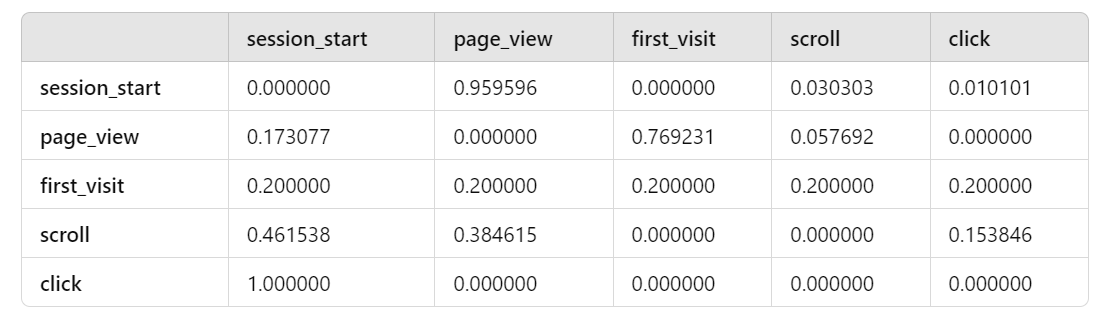

*  **Rows:** Represent the current state or event where the user is (e.g., session_start, page_view).

*  **Columns:** Represent the next possible state or event that the user might transition to.

*  **Values:** Represent the probabilities of transitioning from the current state (row) to the next state (column).


# Interpretation of the Table:

**1. Row 1: From session_start:**

*  **0.959596:** There is a 95.96% chance that, after the session_start (when the user starts a session on the website), the user will go to the page_view state, meaning they will view a page.

*  **0.030303:** There is a 3.03% chance that the user will go to the scroll state after starting the session.

*  **0.010101:** There is a 1.01% chance that the user will immediately click on something (click) after starting the session.

*  **0.000000:** There is no chance (0%) that the user will directly visit the first_visit page after session_start.

**2. Row 2: From page_view:**

* **0.769231:** There is a 76.92% chance that the user will go to first_visit after viewing a page.

*  **0.173077:** There is a 17.31% chance that the user will go back to session_start after viewing a page.

*  **0.057692:** There is a 5.77% chance that the user will scroll on the page after viewing it.

*  **0.000000:** There is no chance that the user will click directly from the page_view state.

**3. Row 3: From first_visit:**

*  **0.200000:** Each of the next states (including session_start, page_view, first_visit, scroll, and click) has a 20% chance of happening. This implies that the next action after the first_visit state is equally probable for all events.

**4.  Row 4: From scroll:**

*  **0.461538:** There is a **46.15% chance** that, after scrolling, the user will go to the **session_start state.**

*  **0.384615:** There is a **38.46% chance** that the user will go to the **page_view state after scrolling.**

*  **0.153846:** There is a **15.38% chance** that the user will click on **something after scrolling.**

*  **0.000000:** The chance of transitioning to first_visit or staying in the scroll state is zero.

**5.  Row 5: From click:**

*  **1.000000:** After a click, the only next step is to go back to the session_start state. This implies that after clicking, the user session starts over or resets.

# What Can We Understand from This?

**Highly Likely Transitions:**

*  Users are **very likely** to move from **session_start to page_view (95.96% chance),** meaning users typically view a page soon after starting a session.

*  After scrolling, users often **go back to session_start (46.15%)** or view another page (38.46%).

**Unlikely Transitions:**

*  Some transitions are highly unlikely. For example, users don’t go directly from **session_start to first_visit (0% chance)** or from click to anything other than **session_start (100% chance of going back).**

**Equal Probabilities in first_visit:**

*  In the first_visit state, all next actions have an equal probability of 20%, indicating that no particular event dominates the user’s actions after their first visit.


# Simulated User Journey Output:

         session_start -> page_view -> first_visit -> session_start -> page_view -> session_start -> page_view -> first_visit -> click -> session_start -> page_view

**What does this output represent?**

This output represents the **path or sequence of actions** a user is most likely to follow on the website, based on the data provided. Each step in the sequence (such as **session_start, page_view, click**, etc.) corresponds to a specific action the user performs while browsing the website.

# Let's break down each term:

**session_start:**

* This means the user has started a session on the website. A session typically begins when a visitor arrives at the website, and it tracks their activity until they leave or stop interacting.

**page_view:**

* This indicates that the user viewed a specific page on the website. The page they viewed could be the homepage or any other content page, like a product or service page.

**first_visit:**

* This represents a user who is visiting the website for the very first time. They haven't been to the site before, and this is their first interaction.

**click:**

* This means that the user clicked on something within the website, such as a button, link, or interactive element.



**Step-by-Step Explanation of the Output:**

**session_start:**

* The user starts their session by entering the website, possibly through an advertisement, search result, or directly typing the website URL.

**page_view:**

* After the session starts, the user views a page. This could be the homepage or any other landing page they were directed to.

**first_visit:**

*  Since this user is visiting the site for the first time, the system registers this action as first_visit. This information is important for understanding new vs. returning customers.

**session_start (again):**

*  After viewing the page and registering as a first-time visitor, the user may have started a new session (perhaps after a short break or after leaving the site and coming back).

**page_view:**

* The user views another page on the website after starting the new session.

**session_start (repeated):**

* The user starts another session. This could indicate multiple sessions in the same day, possibly showing that the user left and returned to the site.

**page_view (repeated):**

*  Another page is viewed by the user during this new session.

**first_visit (repeated):**

*  The system still recognizes this user as a first-time visitor, as it is their first visit within the tracking period.

**click:**

* The user finally clicks on an element, possibly a product, service link, or a contact button.

**session_start -> page_view:**

* The cycle repeats, showing that the user starts yet another session and views more pages.



# What does this mean for the website owner?

* This **simulated user journey** helps the website owner understand how users behave while navigating through the site. It is based on probabilities from historical user data.

**How should the website owner interpret the steps?**

**1. Multiple Sessions:**

* The user starts multiple sessions in this journey. This could mean users return to the site several times, indicating interest in the content or services. However, the owner may want to look at whether users are being given enough information to make decisions within a single session.

**2. Page Views:**

Users frequently view pages, but the site owner should check which pages are being viewed the most. If important pages (like product or service pages) aren’t being viewed enough, the owner might need to improve navigation or add more engaging content on those pages.

**3. First-Time Visitors:**

*  The data shows that this journey involves first-time visitors. It’s important to make a great first impression. The owner should ensure that the website provides a smooth experience for new users, making it easy for them to find what they are looking for.

**4. User Clicks:**

*  After several interactions, the user finally clicks on an element. The website owner should check if the **call-to-action buttons** (e.g., “Buy Now,” “Contact Us,” etc.) are clear and easy to find, as clicks are a sign that users are interacting with key elements.

# What actions should the website owner take?

**Analyze and Optimize Key Pages:**

* The owner should identify which pages are viewed the most. If important pages (like product/service pages) aren’t being viewed enough, they might need to be made more accessible from the homepage.

**Improve the User Experience for First-Time Visitors:**

*  Since many users are first-time visitors, the owner should ensure that the website is welcoming, informative, and easy to navigate for new users. This could include adding **guides, FAQs, or clear navigation.**

**Encourage More Clicks:**

* The journey shows a click after several steps. The owner should ensure that key buttons (like “Learn More,” “Get Started,” “Contact Us”) are easily visible to encourage users to take action sooner.

**Session Duration:**

*  If users are starting many sessions but not completing actions within the same session, the owner might consider ways to keep users engaged longer within a single session. This could be done by adding engaging content or simplifying the checkout or contact process.



# Example Recommendations for the Website Owner:

**1. Make the homepage more engaging:** Add clear calls to action so users know what to do next.

**2. Ensure the website is mobile-friendly:** Many users may be coming from mobile devices, so it’s essential that the site looks good and is easy to navigate on mobile.

**3. Optimize key landing pages:** Improve the content on high-traffic pages like product or service pages to encourage users to click and explore further.

**4. Use Google Analytics:** Continue tracking user behavior to monitor improvements and understand how users engage with the site after making changes.
